# <font color='orange'> 그림 사용

### <font color='blue'> 여러 그림 조합

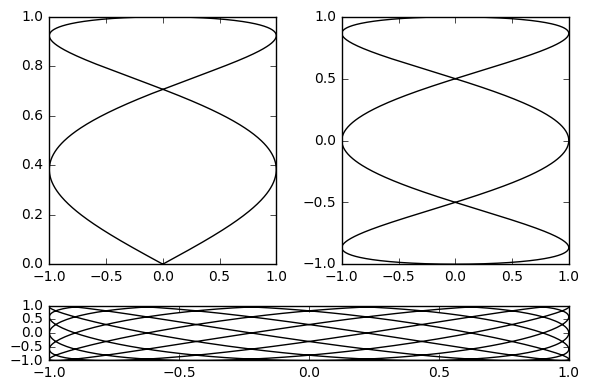

In [1]:
# pyplog.subplot2grid() : R행과 C열의 격자를 정의
# 두번째 파라미터는 격자의 열과 행 숫자(튜플), rowspan은 몇개의 행, colspan은 몇개의 열로 넓힐지 정의 
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(-np.pi, np.pi, 1024)

grid_size = (4, 2)

plt.subplot2grid(grid_size, (0, 0), rowspan=3, colspan=1)
plt.plot(np.sin(2.*T), np.cos(.5*T), c='k')

plt.subplot2grid(grid_size, (0, 1), rowspan=3, colspan=1)
plt.plot(np.cos(3.*T), np.sin(1.*T), c='k')

plt.subplot2grid(grid_size, (3, 0), rowspan=1, colspan=2)
plt.plot(np.cos(5.*T), np.sin(7.*T), c='k')

plt.tight_layout()
plt.show()

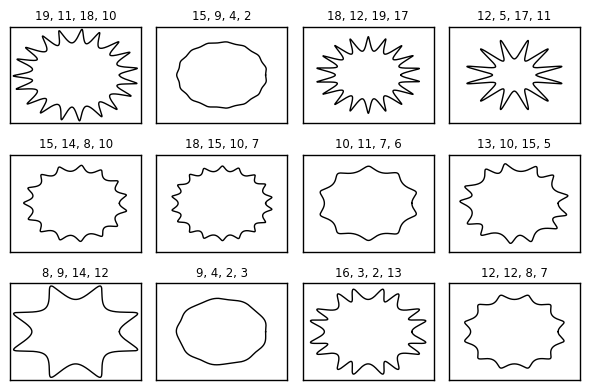

In [2]:
# pyplot.title() : 각 그림에 부제목 추가
import numpy as np
import matplotlib.pyplot as plt

def get_radius(T, params):
    m, n_1, n_2, n_3 = params
    U = (m * T) / 4
    return (np.fabs(np.cos(U)) ** n_2 + np.fabs(np.sin(U)) ** n_3) ** (-1. / n_1)

grid_size = (3, 4)
T = np.linspace(0, 2 * np.pi, 1024)

for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        #params = np.random.random_integers(1, 20, size=4)
        params = np.random.randint(1, 20, size=4)
        R = get_radius(T, params)
        
        axes = plt.subplot2grid(grid_size, (i, j), rowspan=1, colspan=1)
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)
        
        plt.plot(R * np.cos(T), R * np.sin(T), c='k')
        plt.title('%d, %d, %d, %d' % tuple(params), fontsize='small')


plt.tight_layout()
plt.show()

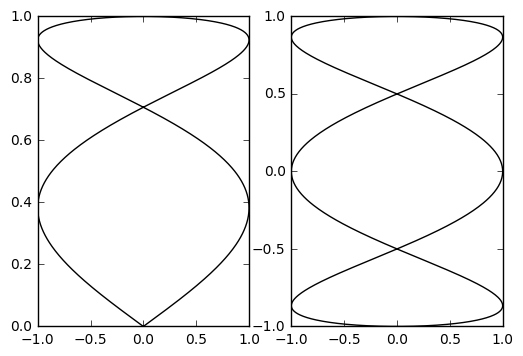

In [3]:
# 그림을 조합하는 다른 방법
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(-np.pi, np.pi, 1024)

fig, (ax0, ax1) = plt.subplots(ncols=2)
ax0.plot(np.sin(2. * T), np.cos(.5 * T), c='k')
ax1.plot(np.cos(3. * T), np.sin(1. * T), c='k')

plt.show()

### <font color='blue'> 양 축을 동일하게 크기 조정

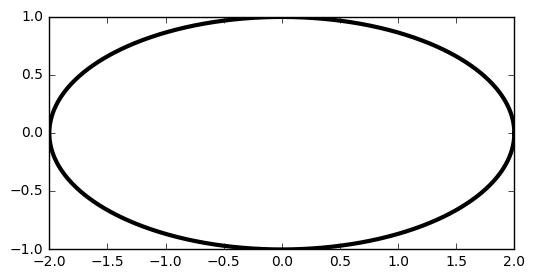

In [4]:
# 맷플롯립은 그림의 양 축에 대한 다른 크기를 기본적으로 사용
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(0, 2*np.pi, 1024)

plt.plot(2.*np.cos(T), np.sin(T), c='k', lw=3.)
plt.axes().set_aspect('equal')

plt.show()

### <font color='blue'> 축 범위 설정

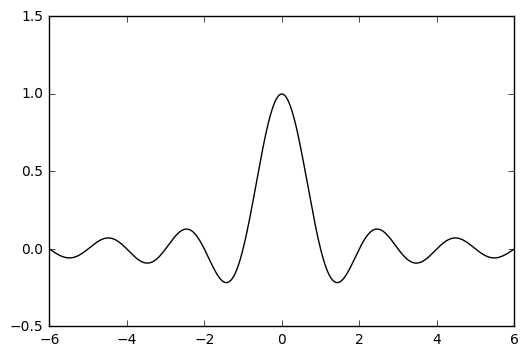

In [5]:
# pyplot.xlim()과 pyplot.ylim() : 각각 x축과 y축의 범위를 제어
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-6, 6, 1024)

plt.ylim(-.5, 1.5)
plt.plot(X, np.sinc(X), c='k')
plt.show()

### <font color='blue'> 종횡비 설정

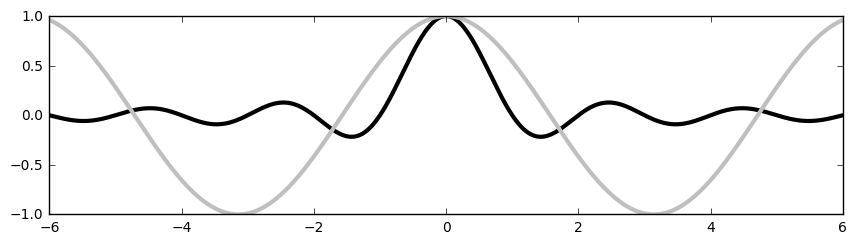

In [6]:
# pyplot.figure() : 그림전체를 표현하는 Figure 인스턴스 생성, figsize는 그림 크기를 지정 
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-6, 6, 1024)
Y1, Y2 = np.sinc(X), np.cos(X)

plt.figure(figsize=(10.24, 2.56))
plt.plot(X, Y1, c='k', lw=3.)
plt.plot(X, Y2, c='.75', lw=3.)

plt.show()

### <font color='blue'> 부그림 삽입

  adjustable: [ 'box' | 'datalim' | 'box-forced'] 
  agg_filter: unknown
  alpha: float (0.0 transparent through 1.0 opaque) 
  anchor: unknown
  animated: [True | False] 
  aspect: unknown
  autoscale_on: unknown
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes: an :class:`~matplotlib.axes.Axes` instance 
  axes_locator: unknown
  axis_bgcolor: any matplotlib color - see :func:`~matplotlib.pyplot.colors` 
  axisbelow: [ *True* | *False* ] 
  clip_box: a :class:`matplotlib.transforms.Bbox` instance 
  clip_on: [True | False] 
  clip_path: [ (:class:`~matplotlib.path.Path`, :class:`~matplotlib.transforms.Transform`) | :class:`~matplotlib.patches.Patch` | None ] 
  color_cycle: unknown
  contains: a callable function 
  figure: unknown
  frame_on: [ *True* | *False* ] 
  gid: an id string 
  label: string or anything printable with '%s' conversion. 
  navigate: [ *True* | *False* ] 
  navigate_mode: unknown
  path_effects: unknown
  picker: [None|float|boolean|callable] 
  positi

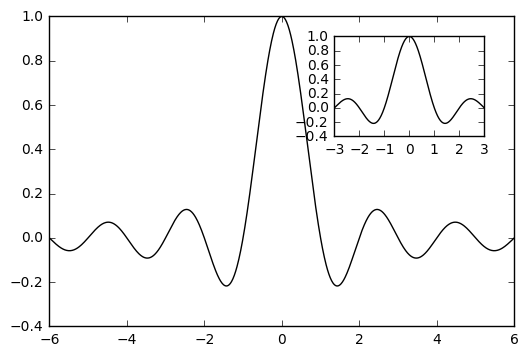

In [7]:
# 일단 부영역을 정의하면, 그림을 생성한 곳의 Axes 인스턴스를 갖는다.
# 그런후에 Axes 인스턴스를 갖고 pyplot.setp()를 호출
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)

X_detail = np.linspace(-3, 3, 1024)
Y_detail = np.sinc(X_detail)

plt.plot(X, Y, c='k')

sub_axes = plt.axes([.6, .6, .25, .25])
sub_axes.plot(X_detail, Y_detail, c='k')
plt.setp(sub_axes)

plt.show()

### <font color='blue'> 대수 척도 사용

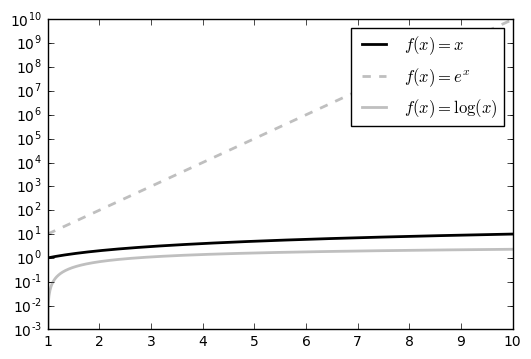

In [8]:
# 매우 넓은 범위에 걸쳐 변하는 데이터를 시각화 할때, 대수척도는 변화를 시각화 해주며, 그렇지 않으면 거의 보이지 않는다.
# 그림의 크기 조정 시스템을 조작
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(1, 10, 1024)

plt.yscale('log')
plt.plot(X, X, c='k', lw=2., label=r'$f(x)=x$')
plt.plot(X, 10**X, c='.75', ls='--', lw=2., label=r'$f(x)=e^x$')
plt.plot(X, np.log(X), c='.75', lw=2., label=r'$f(x)=\log(x)$')

plt.legend()
plt.show()

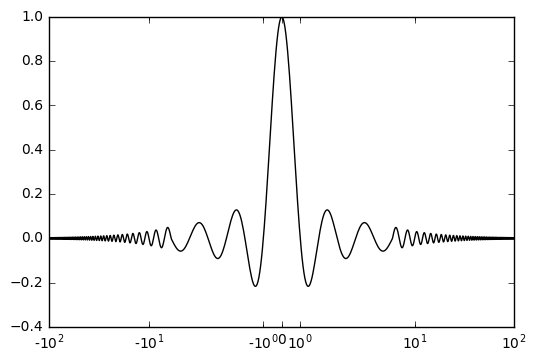

In [9]:
# 대수 척도를 사용하면 작은 범위의 데이터를 매우 큰 범위로 확대할 때도 유용
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-100, 100, 1024*4)

# 범위에서 벗어난 선형과 대수척도를 원했으므로, linethreshx=6.를 통해 [-6, 6] 범위를 지정
plt.xscale('symlog', linthreshx=6.)
plt.plot(X, np.sinc(X), c='k')
plt.show()

### <font color='blue'> 극좌표 사용

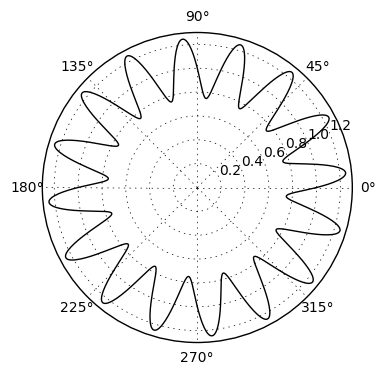

In [10]:
# 극좌표(polar coordinate) : 년별 혹은 일별 통계 같은 주기적인 데이터를 편리하게 그릴수 있다.
# 간단한 극곡선 랜더링
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(0, 2*np.pi, 1024)

plt.axes(polar = True)
plt.plot(T, 1. + .25*np.sin(16*T), c='k')

plt.show()

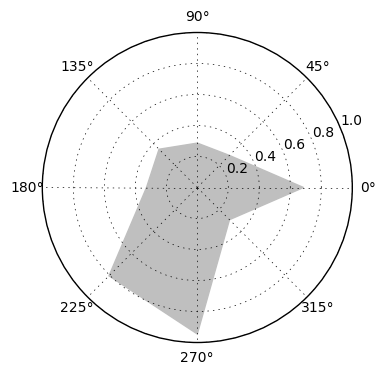

In [11]:
# 극투영과 다각형을 사용해서 레이더 플롯 만들기
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt

ax = plt.axes(polar = True)

theta = np.linspace(0, 2*np.pi, 8, endpoint=False)
radius = .25 + .75*np.random.random(size = len(theta))
points = np.vstack((theta, radius)).transpose()

plt.gca().add_patch(patches.Polygon(points, color='.75'))
plt.show()